## Regression Week 1: Simple Linear Regression Assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
# use the following types for columns when importing the csv files
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

In [3]:
# load all csv files
kc_house_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
kc_house_train_data = pd.read_csv('kc_house_train_data.csv', dtype = dtype_dict)
kc_house_test_data = pd.read_csv('kc_house_test_data.csv', dtype = dtype_dict)

In [4]:
def simple_linear_regression(data, input_feature, output_feature):
    # closed-form solution
    x = data[input_feature]
    y = data[output_feature]
    N = len(x) * 1.0
    xy = x * y
    xsquared = x ** 2
    slope = (xy.sum() - (y.sum() * x.sum() / N)) / (xsquared.sum() - (x.sum() * x.sum() / N))
    intercept = y.sum() / N - slope * x.sum() / N
    return intercept, slope

In [5]:
def get_regression_predictions(input_data, intercept, slope):
    return slope * input_data + intercept   

In [6]:
def inverse_regression_predictions(output_data, intercept, slope):
    return (output_data - intercept) / slope

In [7]:
def get_residual_sum_of_squares(data, input_feature, output_feature, intercept, slope):
    x = data[input_feature]
    y = data[output_feature]
    rss = (y - (slope * x + intercept)) ** 2
    return rss.sum()

In [8]:
# def simple_linear_regression2(x, y):
#     # closed-form solution
#     N = len(x)
#     xy = x * y
#     xsquared = x * x
#     slope = (xy.sum() - y.sum() * x.sum() / N) / (xsquared.sum() - x.sum() * x.sum() / N)
#     intercept = y.sum() / N - slope * x.sum() / N
#     return intercept, slope

In [9]:
# def get_residual_sum_of_squares2(x, y, intercept, slope):
#     rss = (y - (slope * x + intercept)) ** 2
#     return rss.sum()

In [10]:
# test_input = kc_house_test_data['sqft_living']
# test_output = 1 + 1 * test_input;
# test_intercept, test_slope = simple_linear_regression2(test_input, test_output)
# print(test_intercept, test_slope)

In [11]:
# test_rss = get_residual_sum_of_squares2(test_input, test_output, 1, 1)
# print(test_rss)

### Predict house price using squarefeet living

In [12]:
# calculate the estimated slope and intercept on the training data to predict ‘price’ given ‘sqft_living’
sf_intercept, sf_slope = simple_linear_regression(kc_house_train_data, 'sqft_living', 'price')
print('Estimated slope and intercept on the training data to predict price given sqft_living is', sf_slope, 'and', sf_intercept)

Estimated slope and intercept on the training data to predict price given sqft_living is 281.9588396303426 and -47116.07907289418


In [24]:
predicted_house_price = get_regression_predictions(2650, sf_intercept, sf_slope)
print('The predicted price for a house with 2650 sqft is %.2f' % predicted_house_price)

The predicted price for a house with 2650 sqft is 700074.85


In [14]:
RSS = get_residual_sum_of_squares(kc_house_train_data, 'sqft_living', 'price', sf_intercept, sf_slope)
print('%E' % RSS)

1.201918E+15


In [25]:
predicted_squarefeet = inverse_regression_predictions(800000, sf_intercept, sf_slope)
print('the estimated square-feet for a house costing $800,000 is %.2f' % predicted_squarefeet)

the estimated square-feet for a house costing $800,000 is 3004.40


In [16]:
sf_xdata = kc_house_train_data['sqft_living']
sf_ydata = get_regression_predictions(sf_xdata, sf_intercept, sf_slope)

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

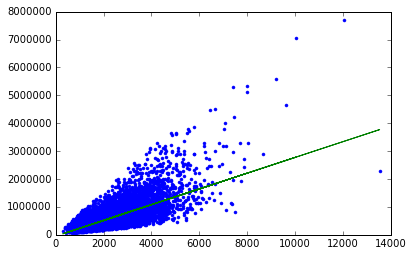

In [18]:
fig, ax = plt.subplots()
ax.plot(kc_house_train_data['sqft_living'], kc_house_train_data['price'], '.')
ax.plot(sf_xdata, sf_ydata)
plt.show()

### Predict house price using bedrooms

In [28]:
# calculate the estimated slope and intercept on the training data to predict ‘price’ given ‘sqft_living’
br_intercept, br_slope = simple_linear_regression(kc_house_train_data, 'bedrooms', 'price')
print('Estimated slope and intercept on the training data to predict price given bedrooms is %.2f and %.2f' % (br_slope, br_intercept))

Estimated slope and intercept on the training data to predict price given bedrooms is 127588.95 and 109473.18


In [20]:
RSS_sf = get_residual_sum_of_squares(kc_house_test_data, 'sqft_living', 'price', sf_intercept, sf_slope)
RSS_br = get_residual_sum_of_squares(kc_house_test_data, 'bedrooms', 'price', br_intercept, br_slope)
print('RSS from squarefeet is %E' % RSS_sf)
print('RSS from bedrooms is %E' % RSS_br)

RSS from squarefeet is 2.754029E+14
RSS from bedrooms is 4.933646E+14


In [21]:
br_xdata = kc_house_train_data['bedrooms']
br_ydata = get_regression_predictions(br_xdata, br_intercept, br_slope)

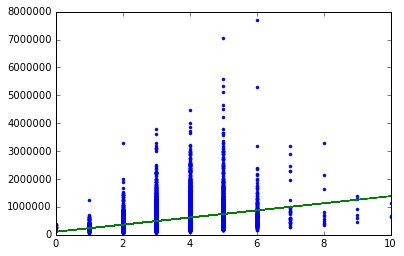

In [22]:
fig, ax = plt.subplots()
ax.plot(kc_house_train_data['bedrooms'], kc_house_train_data['price'], '.')
ax.plot(br_xdata, br_ydata)
plt.show()